# Linear Discriminant Analysis

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=9IDXYHhAfGA&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=14

## Goal

Feature reduction. The goal is to project a dataset onto a lower-dimensional space with good class-separability.

### Notes

Linear discriminant analysis algorithm (LDA) is a dimensionality reduction technique and a popular pre-processig step in machine learning piprlines. LDA is similar to the PCA technique. The approach and the implementaion of PCA and LDA have a lot in common.

The concept of LDA is feature reduction so we want to project our datasets onto a lower dimensional space and find a good class separation so here we have the difference between PCA and LDA. In Principal Component Analysis we want to find new axis onto which we project our data such that we maximize the variance on the new axis. In LDA the big difference is that we know the feature labels so this is a supervised technique (PCA is unsupervised) and here we want to find new axis such that the class separation is maximized. If we have a look at this image below, we have two different classes and we could project our data either onto the y axis or onto x axis. In this case the y axis would not be a good choice but the x axis is a good choice because here we still have a good class separation. This is the concept of the LDA.

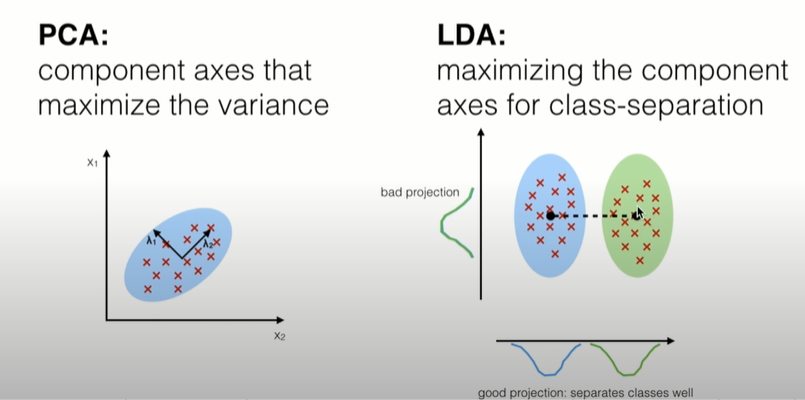

## PCA vs LDA

+ PCA and LDA: finding the component axes that maximize the variance of our data
+ LDA Additionally interested in the axes that maximize the separation between multiple classes
+ LDA is supervised learning (we have y), PCA is unsupervised!

## Math

1 ) Within-class scatter matrix

$\displaystyle S_{W} = \sum_{c}S_{c} $ 

$\displaystyle S_{c} = \sum_{i \in c}(x_{i} - \bar{x}_{c}) \cdot (x_{i} - \bar{x}_{c})^{T} $

2 ) Between class scatter matrix

$\displaystyle S_{B} = \sum_{c} n_{c} \cdot (\bar{x}_{c} - \bar{x}) \cdot (\bar{x}_{c} - \bar{x})^{T} $

## Eigenvalue, Eigenvector problem

Compute Eigenvalues and Eigenvectors for

$ S_{W}^{-1}S_{B} $

### Notes

We have two different scatter matrices, the within-class scatter matrix and the between class scatter matrix. The within-class scatter matrix make sure that our features within one class are good separated and the between class scatter matrix makes sure that the two or all the classes are good separated. If we translate this to the math we have to deal with the mean values and the variances so the formula of the within-class scatter is the sum over the scatters and each scatter of one class it's the sum over the feature value minus the mean value of all the features only in this class and then times the same transposed and then we sum over all the features in this class so this is basically the same as in the PCA algorithm where we want to compute the covariance matrix so this is almost the same formula as for the covariance matrix except that we don't have the scaling at the beginning so this is the within class scatter. The between class scatter formula is the sum over all the classes and then for each class we have the number of labels in this class times the mean value of the features in this class minus the mean value in total (the total mean of all features) and then times the same transposed. So these are the two matrices that we have to compute and then we calculate the inverse of the within class scatter and multiply that with a between class scatter and this is our eigenvalue and eigenvector problem that we have to solve so this is the same as in the PCA.

## Approach

+ Calculate $S_{B}$
+ Calculate $S_{W}$
+ Calculate Eigenvalues of $S_{W}^{-1}S_{B}$
+ Sort the Eigenvectors according to their Eigenvalues in decreasing order
+ Choose first k Eigenvectors and that will be the new k dimensions (linear discriminants)
+ Transform the original n dimensional data points into k dimensions (= Projections with dot product)

In [5]:
import numpy as np

class LDA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        
    def fit(self, X, y):
        # index 0 is number of samples
        n_features = X.shape[1] # iris 150, 4
        # returns only unique values from labels, returns a list
        class_labels = np.unique(y)
        
        # S_W, S_B
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features)) # 4,4
        S_B = np.zeros((n_features, n_features)) # 4,4
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # we are transposing first term because we want to have 4,4 matrix not n_c,n_c
            # (4, n_c) * (n_c, 4) = (4,4)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            
            n_c = X_c.shape[0]
            # we will have (4,) shape but we want (4,1) so we have to reshape
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)
            
        A = np.linalg.inv(S_W).dot(S_B)
        
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        # list slicer because we want to sort it in descending order
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        self.linear_discriminants = eigenvectors[0:self.n_components]
        
    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


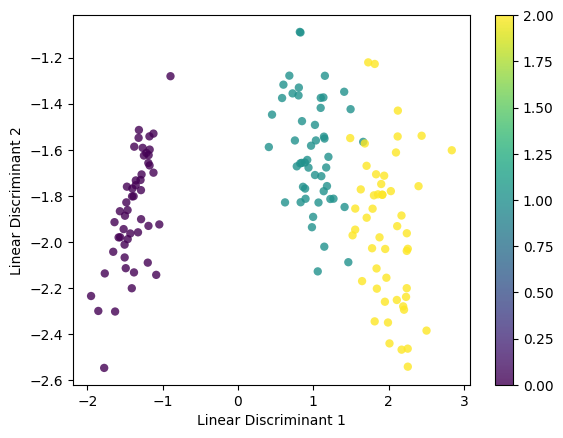

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary linear disccriminants
lda = LDA(2)
lda.fit(X, y)

X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.matplotlib.colormaps['viridis'])

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()